In [1]:
%matplotlib inline
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import xarray as xr
%run ../../COMMON/plot_and_table_functions.py

In [2]:
def create_file_reference( component_name ):
    '''
    This is a simple convenience function that will form a path and filename to a
    given water budget component
    '''
    # specify the prefix, path to SWB2 output, timeframe, and resolution
    output_path = '../output/'
    prefix      = 'maui_'
    start_date  = '2001-01-01'
    end_date    = '2002-12-31'
    ncol        = '316'
    nrow        = '210'
    return( output_path + prefix + component_name + '__' + start_date + '_' 
          + end_date + '__' + nrow + '_by_' + ncol + '.nc' )

### Use xarray to open up a SWB 2.0 output netCDF file

In [3]:
irrigation = xr.open_dataset( create_file_reference( 'irrigation') )

if irrigation is None:
    print('Could not open SWB 2.0 NetCDF grid file')
    sys.exit(1)

### Create mask to eliminate any values that are actually ocean cells

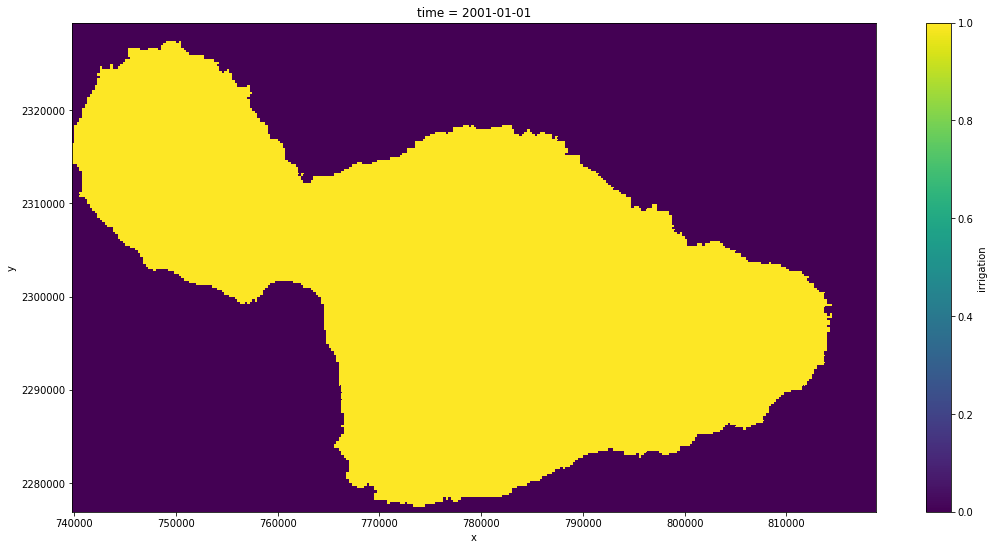

In [4]:
mask_water = 2 * np.zeros( ( irrigation.dims['y'], irrigation.dims['x'] ) ) * np.isnan( irrigation.irrigation.isel(time=0))
mask_land = 1 * np.ones( ( irrigation.dims['y'], irrigation.dims['x'] ) ) * np.isfinite( irrigation.irrigation.isel(time=0))
mask_array = mask_water + mask_land
mask_array.plot(aspect=2, size=9,add_labels=True)

### Add mask information to coords member in xarray object

In [5]:
irrigation.coords['mask'] = (('y','x'), mask_array )

In [6]:
irrigation.coords

Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 2001-01-03 ...
  * y        (y) float64 2.329e+06 2.329e+06 2.329e+06 2.329e+06 2.328e+06 ...
  * x        (x) float64 7.399e+05 7.402e+05 7.404e+05 7.407e+05 7.409e+05 ...
    lat      (y, x) float64 21.05 21.05 21.05 21.05 21.05 21.05 21.05 21.05 ...
    lon      (y, x) float64 -156.7 -156.7 -156.7 -156.7 -156.7 -156.7 -156.7 ...
    mask     (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

### Sum irrigation over calendar year 2001

In [14]:
annual_irrigation = irrigation.irrigation.sel(time=slice('2002-01-01','2002-12-31'))
annual_sum = annual_irrigation.where( annual_irrigation.mask == 1 ).sum(dim='time')


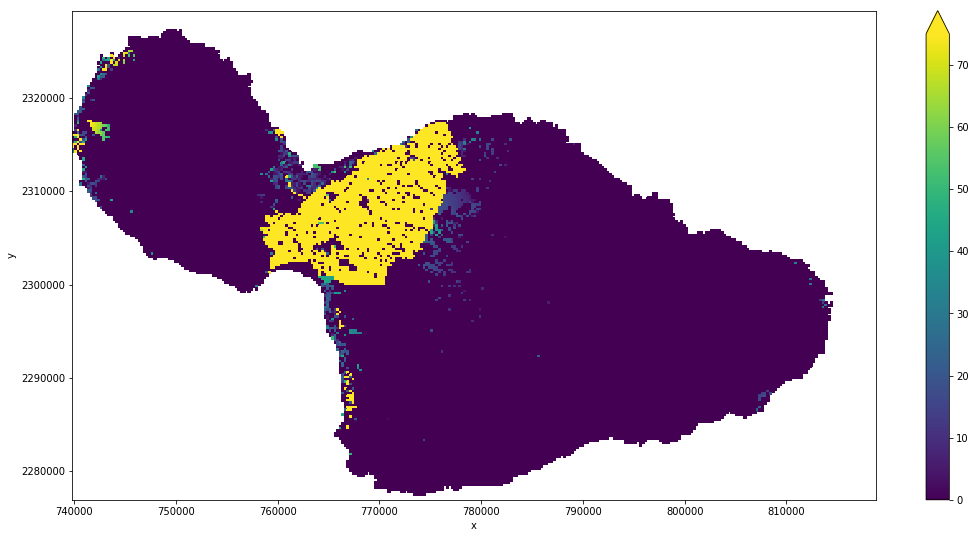

In [15]:
annual_sum.where(annual_sum.mask == 1).plot(aspect=2, size=9, vmax=75., add_labels=True)